In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import random

In [ ]:
data = mnist.load_data()
(x_train,y_train),(x_test, y_test) = data

#Explore Data
**Get an overall understanding of MNIST dataset. Check shape and see sample images of data.**

In [ ]:
#See current shape of data.
print("x_train.shape =>", x_train.shape)
print("y_train.shape =>", y_train.shape)

x_train.shape => (60000, 28, 28)
y_train.shape => (60000,)


y_train number => 3
x_train image =>


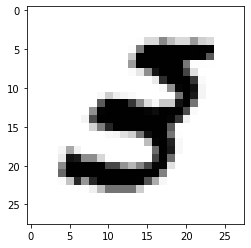

In [ ]:
#See image and verifies response of training data.
index = random.randint(0,59999)
print("y_train number =>", y_train[index])
print("x_train image =>")
plt.imshow(x_train[index],cmap='Greys')

y_test number => 8
x_test image =>


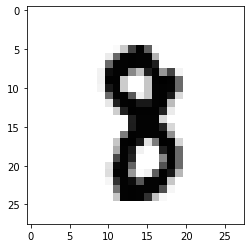

In [ ]:
#See image and verifies response of test data.
index = random.randint(0,9999)
print("y_test number =>", y_test[index])
print("x_test image =>")
plt.imshow(x_test[index],cmap='Greys')

#Data Preprocessing
**Reshape and normalise data. Converts numerical labels to categorical.**

In [ ]:
#Converts y values into categorical. Current values will be taken as numerical and decimals might be output as response.
print("y_train.shape => ", y_train.shape)
print("y_test.shape => ", y_test.shape)

ycat_train = to_categorical(y_train)
ycat_test = to_categorical(y_test)

print("ycat_train.shape => ", ycat_train.shape)
print("ycat_test.shape => ", ycat_test.shape)


y_train.shape =>  (60000,)
y_test.shape =>  (10000,)
ycat_train.shape =>  (60000, 10)
ycat_test.shape =>  (10000, 10)


In [ ]:
#Reshape of data for model fitting.
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [ ]:
#Normalise / scale data to between 0 and 1.
x_train = x_train/255
x_test = x_test/255

#Model Training and Fitting
**Create model with the desired layers and parameters. Compile and run model to fit model to the data.**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Dropout,Flatten,MaxPool2D
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
#Create and compile model with desired configuration.
model = Sequential()

model.add(Conv2D(filters=64,
                 kernel_size=(2,2),
                 input_shape=(28,28,1), 
                 padding='valid',
                 activation='relu', 
                 ))

model.add(MaxPool2D(pool_size=(4,4)))

model.add(Conv2D(filters=32, 
                 kernel_size=(2,2),
                 padding='valid',
                 activation='relu', 
                 ))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#Set up early stopping parameter
early_stop = EarlyStopping(monitor='val_loss',patience=10)

In [ ]:
#Fit model to data
model.fit(x_train,
          ycat_train,
          epochs=100,
          callbacks=[early_stop],
          validation_data=(x_test,ycat_test))

Epoch 1/100
1875/1875 [==============================] - 40s 21ms/step - loss: 0.5063 - accuracy: 0.8372 - val_loss: 0.1515 - val_accuracy: 0.9534
Epoch 2/100
1875/1875 [==============================] - 38s 20ms/step - loss: 0.1978 - accuracy: 0.9409 - val_loss: 0.1093 - val_accuracy: 0.9673
Epoch 3/100
1875/1875 [==============================] - 38s 20ms/step - loss: 0.1577 - accuracy: 0.9532 - val_loss: 0.1089 - val_accuracy: 0.9657
Epoch 4/100
1875/1875 [==============================] - 38s 20ms/step - loss: 0.1325 - accuracy: 0.9615 - val_loss: 0.0899 - val_accuracy: 0.9710
Epoch 5/100
1875/1875 [==============================] - 38s 20ms/step - loss: 0.1206 - accuracy: 0.9653 - val_loss: 0.0910 - val_accuracy: 0.9698
Epoch 6/100
1875/1875 [==============================] - 37s 20ms/step - loss: 0.1053 - accuracy: 0.9682 - val_loss: 0.0905 - val_accuracy: 0.9727
Epoch 7/100
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0981 - accuracy: 0.9709 - val_loss: 0

#Model Evaluation
**Evaluate performance of model to the test data (validation). Review classification report and confusion matrix for details of fitting. Predict (new) data to test model.

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [ ]:
#Put result into a pandas dataframe for easy viewing and plotting
result = pd.DataFrame(model.history.history)

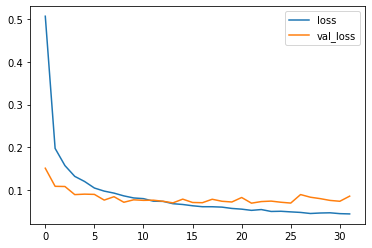

In [ ]:
#Plot of loss vs validation loss. Should see stopping before val_loss rising up due to bias-variance trade-off.
result[['loss','val_loss']].plot()

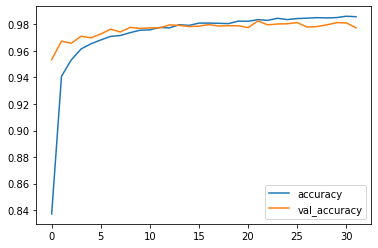

In [ ]:
#Plot of accuracy vs validation accuracy
result[['accuracy','val_accuracy']].plot()

In [ ]:
#Get the metrics from the model. The metrics are the same as the last epoch.
metrics = model.evaluate(x_test,ycat_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0863 - accuracy: 0.9773


In [ ]:
#Use the model to predict the test data.
predictions = np.argmax(model.predict(x_test),axis=-1)
predictions

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
#See the actual 'answers' for the inputs to compare with the predicted results later.
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [ ]:
#See the statistics after comparing the 'real' results and the predictions
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.98      0.98      0.98      1010
           4       0.96      0.99      0.98       982
           5       0.97      0.99      0.98       892
           6       0.99      0.98      0.98       958
           7       0.95      0.97      0.96      1028
           8       0.99      0.97      0.98       974
           9       0.99      0.95      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



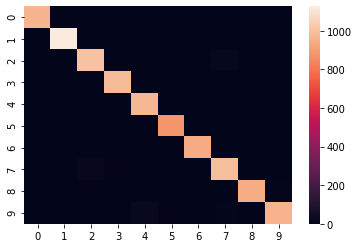

In [ ]:
#Another view of the results in terms of the absolute numbers, correctly or wrongly predicted.
sns.heatmap(confusion_matrix(y_test,predictions))

5


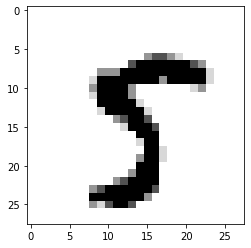

In [ ]:
#Predict randomly chosen image
index = random.randint(0,9999)
sample_image = x_test[index].reshape(28,28,1)
print(y_test[index])
sample_image = sample_image.reshape(28,28)
plt.imshow(sample_image, cmap='Greys')

In [ ]:
#Predict the response though strictly speaking, we should have used totally new data. 
np.argmax(model.predict(sample_image.reshape(1,28,28,1)))

5

#Results


Accuracy ==> 98% of the total predictions were predicted correctly.

Highest Precision ==> For the following numbers, 99% of those predicted (True + False Positives) were actually correct (True Positives).
- Number 1
- Number 6
- Number 8
- Number 9

Highest Recall ==> For the following numbers, 99% of the correct data (True Positives + False Negatives) is actually predicted correctly (True Positives).
- Number 1
- Number 4
- Number 5

# Analysis

- As expected, model produced good results with accuracy, precision and recall rates of more than 95%.
- Model also correctly predicted the test prediction, although strictly speaking, this data used for the last prediction should be "new" and not extracted from the test set.
- Also expected was that this model performs much better than the Distorted Number Model although the Distorted Number Model might be more suitable for real-life scenarios.